In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
red = pd.read_csv('winequality-red.csv', delimiter=",")
white = pd.read_csv('winequality-white.csv', delimiter=",")

In [3]:
white['color'] = 0
red['color'] = 1

In [4]:
allwines = red.append(white, ignore_index=True)

In [5]:
allwines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [74]:
target = allwines["color"]
# target_names = ["white", "red"]

In [75]:
data = allwines.drop("color", axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5,1


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
(data, target, test_size = 0.90)

In [77]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: Unknown label type: 'continuous'

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.99093707250342

In [47]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.3338166048433739, 'total sulfur dioxide'),
 (0.18633954589737864, 'chlorides'),
 (0.12785402275370272, 'volatile acidity'),
 (0.06853600543995333, 'free sulfur dioxide'),
 (0.0655642961956931, 'density'),
 (0.0581983670952707, 'sulphates'),
 (0.05228646497052576, 'fixed acidity'),
 (0.040742923645982546, 'residual sugar'),
 (0.03531934425552334, 'citric acid'),
 (0.016637649089029663, 'pH'),
 (0.010514955399678028, 'alcohol'),
 (0.004189820413888294, 'quality')]

Text(0.5, 0, 'Relative Importance')

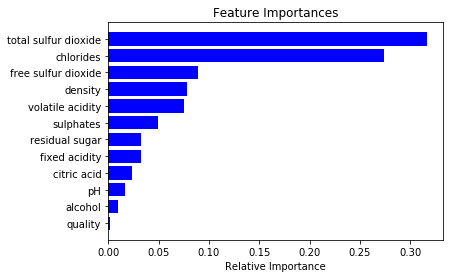

In [19]:
import numpy as np
import matplotlib.pyplot as plt
features=feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [72]:
predictions = rf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4396
           1       1.00      0.97      0.98      1452

    accuracy                           0.99      5848
   macro avg       0.99      0.98      0.99      5848
weighted avg       0.99      0.99      0.99      5848



In [70]:
# import seaborn as sns
# sns.pairplot(allwines)

In [ ]:
# class probabilities for x
